at first i will conect kaggle with google colab


In [2]:
! pip install -q kaggle   # install kaglle

In [3]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"mohamedaymanelzoka","key":"1274f694ce1f18fd8b633e29774732ca"}'}

In [4]:
! mkdir ~/.kaggle   # creat folder "Kaggle"

In [5]:
! cp kaggle.json  ~/.kaggle   # copy json file to folder kaglle

In [6]:
! chmod 600 ~/.kaggle/kaggle.json   # change acess type to json file

In [7]:
! kaggle datasets list

ref                                                 title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023     Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          12238        411  1.0              
nelgiriyewithana/top-spotify-songs-2023             Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           1960         76  1.0              
iamsouravbanerjee/airline-dataset                   Airline Dataset                                  4MB  2023-08-30 12:03:12            815         27  1.0              
kacperrabczewski/every-porsche-911                  Every Porsche 911 since 1964                    21KB  2023-08-30 21:24:31            524     

getting the dataset

In [8]:
! kaggle datasets download -d puneet6060/intel-image-classification

100% 346M/346M [00:17<00:00, 24.2MB/s]
100% 346M/346M [00:17<00:00, 20.9MB/s]


In [9]:
! unzip /content/intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [10]:
import os  # operating system << handel any dierctory>>

In [12]:
os.listdir('/content/seg_train')

['seg_train']

In [13]:
len(os.listdir('/content/seg_train'))

1

In [14]:
import PIL

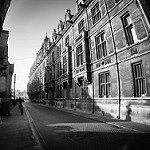

In [16]:
PIL.Image.open('/content/seg_train/seg_train/street/9879.jpg')


importing the liberaries

In [11]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob as gb
import tensorflow as tf
import keras
import cv2
from keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.image as img
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

make data agumentation

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1/255)
training_dataset_directory='/content/seg_train/seg_train'
train_generator=tf.keras.utils.image_dataset_from_directory(training_dataset_directory,batch_size=1,image_size= (100, 100))

test_dataset_directory='/content/seg_test/seg_test'
validation_generator=tf.keras.utils.image_dataset_from_directory(test_dataset_directory,batch_size=1,image_size= (100, 100))

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


plotting the data

In [13]:
x_train = []
y_train = []
x_test = []
y_test = []

c = 0
for image, label in train_generator:
    x_train.append(np.array(image))
    y_train.append(np.array(label))
    c+=1
    if c >= 40:
        break

c = 0
for image, label in validation_generator:
    x_test.append(np.array(image))
    y_test.append(np.array(label))
    c+=1
    if c >= 40:
        break

x_train = np.array(x_train)
print(x_train.shape)
x_train = np.reshape(x_train, (40, 100, 100, 3))

(40, 1, 100, 100, 3)


normalize the data

In [14]:
x_train_normalized = x_train / 255.0

(40, 100, 100, 3)


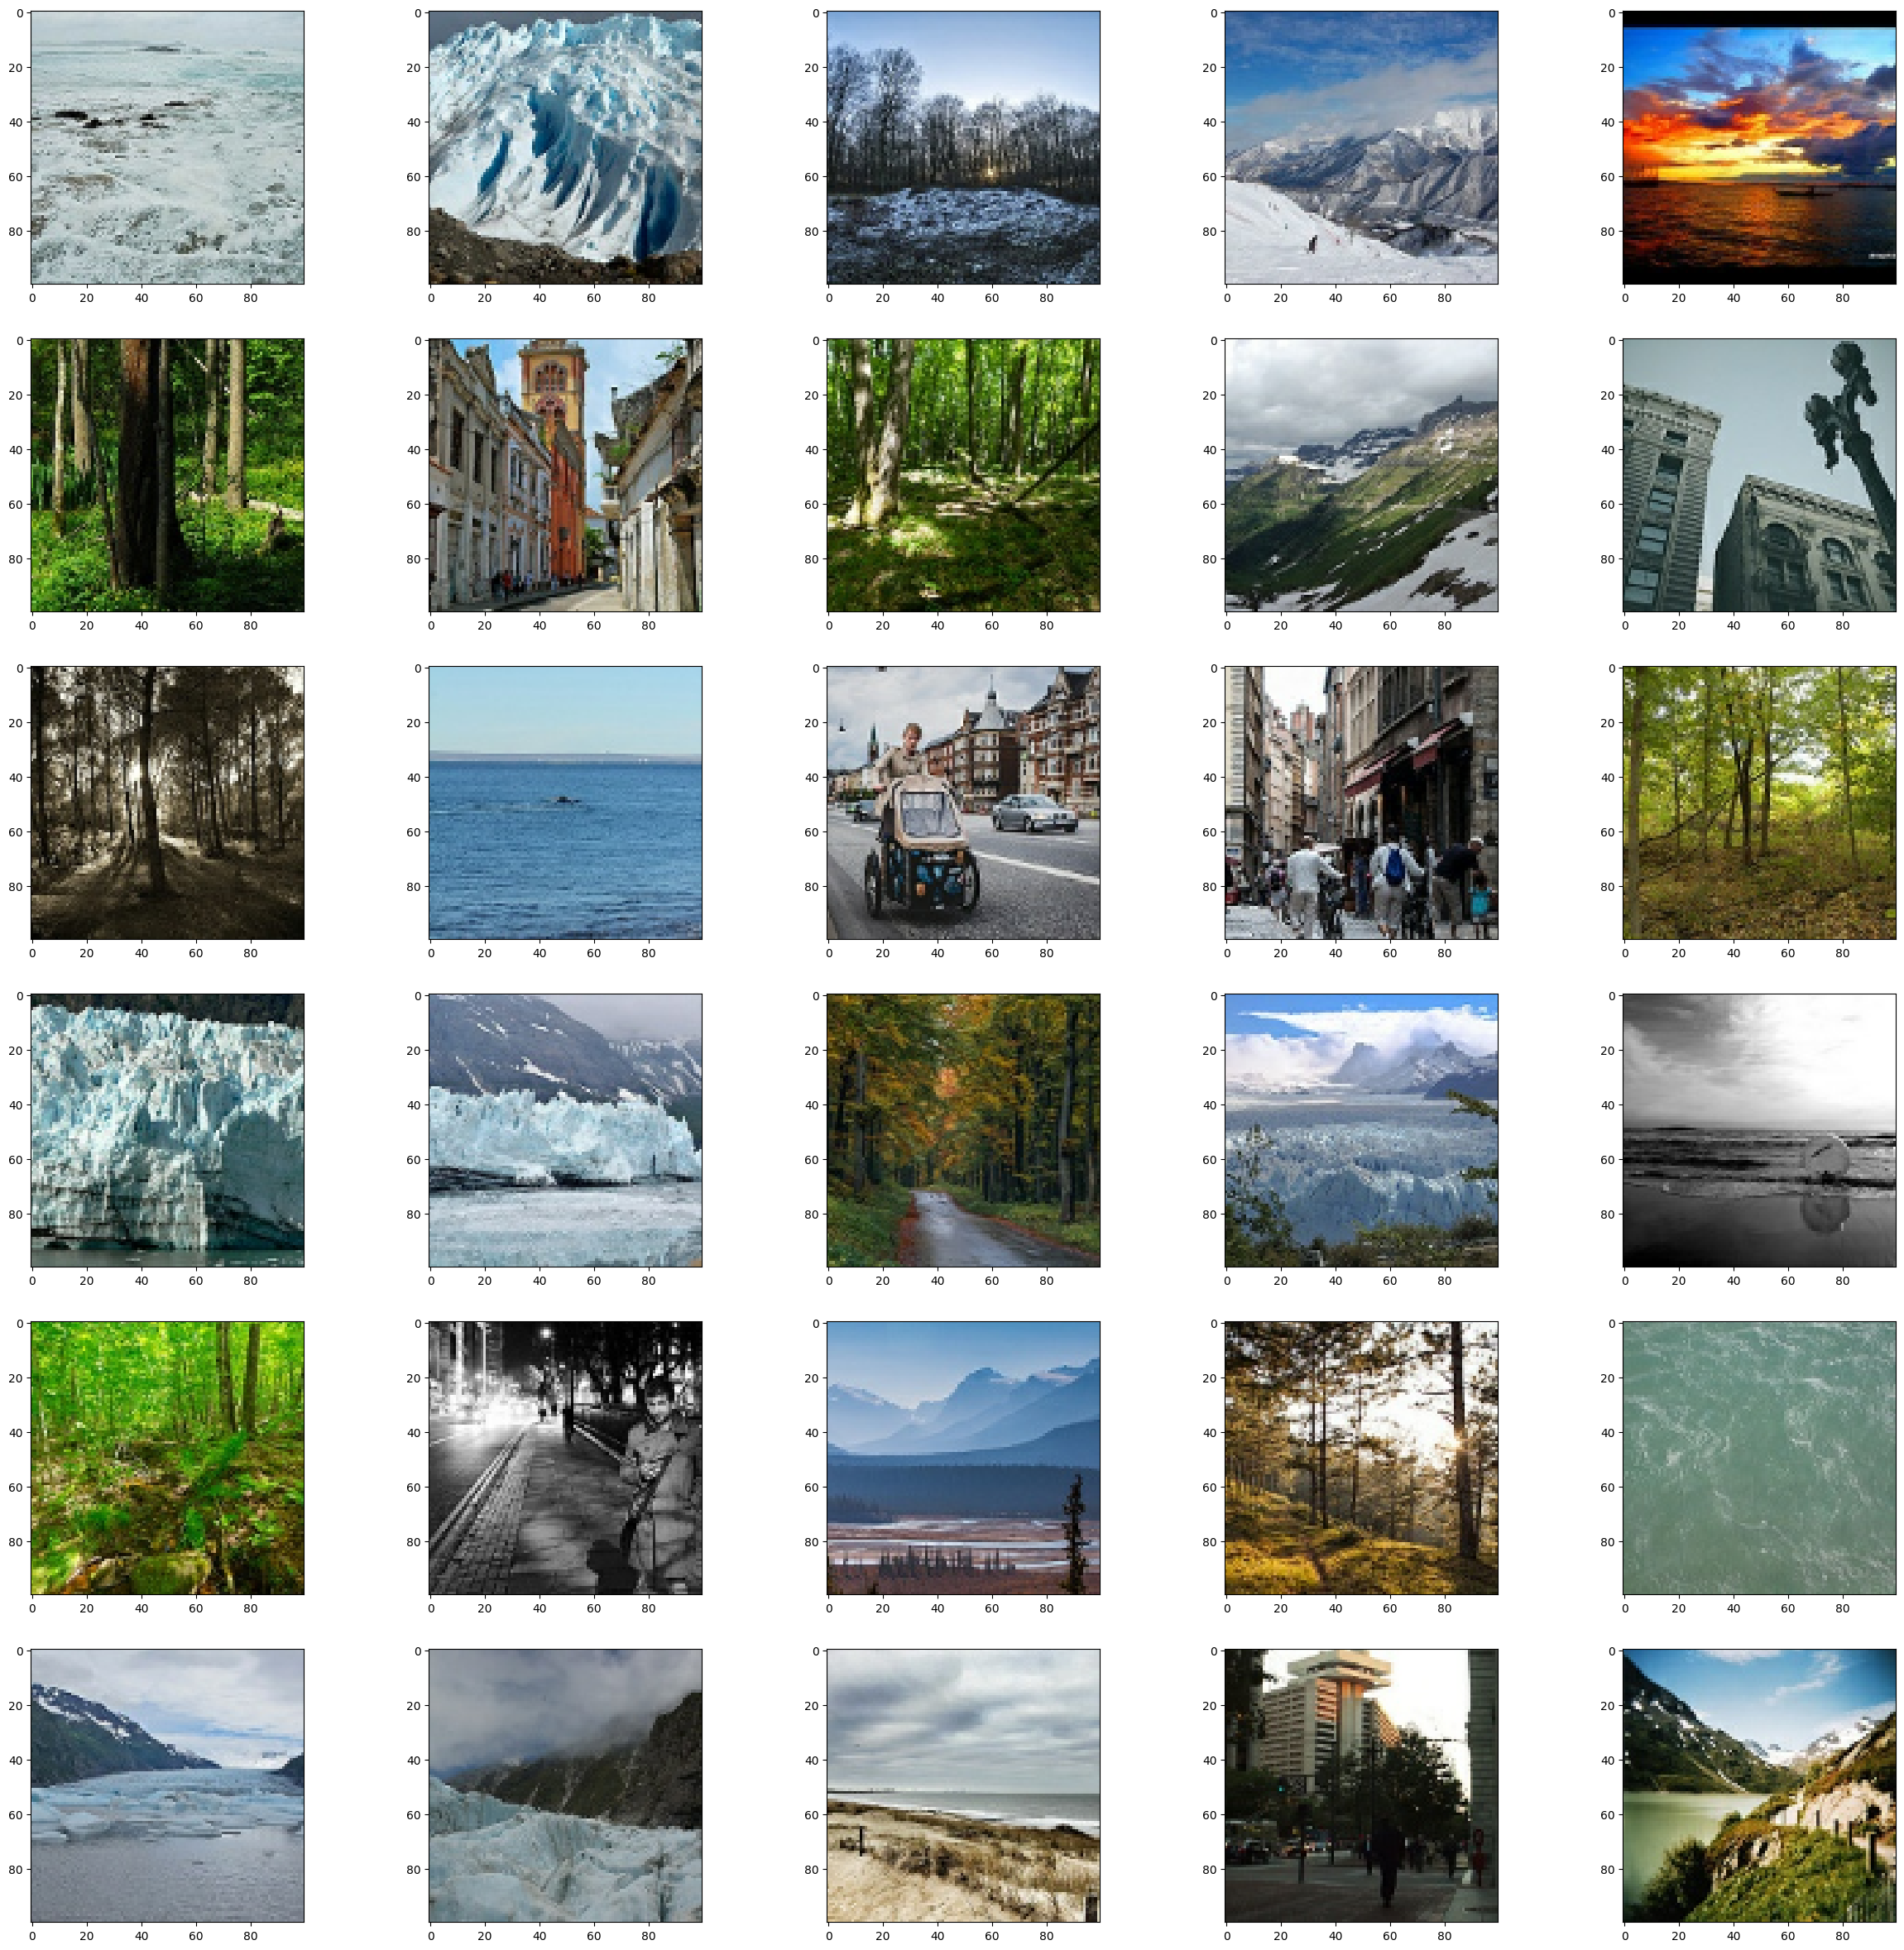

In [35]:
print(x_train.shape)
fig, ax = plt.subplots(6, 5,figsize=(30, 30))
for i in range(0, 30):
    ax[(int)(i / 5), (i % 5)].imshow(x_train_normalized[i])

buliding the CNN model

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [41]:
from keras.utils import to_categorical

# Assuming y_train is your original target data
y_train_encoded = to_categorical(y_train, num_classes=6)



compiling the model

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


fitting the model

In [43]:
history = model.fit(
      train_generator,
      epochs=10,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/10
14034/14034 [==============================] - 93s 6ms/step - loss: 1.9499 - accuracy: 0.1744 - val_loss: 1.7971 - val_accuracy: 0.1750
Epoch 2/10
14034/14034 [==============================] - 81s 6ms/step - loss: 1.8058 - accuracy: 0.1761 - val_loss: 1.7933 - val_accuracy: 0.1750
Epoch 3/10
14034/14034 [==============================] - 82s 6ms/step - loss: 1.8010 - accuracy: 0.1763 - val_loss: 1.7968 - val_accuracy: 0.1750
Epoch 4/10
14034/14034 [==============================] - 80s 6ms/step - loss: 1.7929 - accuracy: 0.1778 - val_loss: 1.7973 - val_accuracy: 0.1750
Epoch 5/10
14034/14034 [==============================] - 79s 6ms/step - loss: 1.7917 - accuracy: 0.1750 - val_loss: 1.7924 - val_accuracy: 0.1750
Epoch 6/10
14034/14034 [==============================] - 79s 6ms/step - loss: 1.7915 - accuracy: 0.1749 - val_loss: 1.7925 - val_accuracy: 0.1750
Epoch 7/10
14034/14034 [==============================] - 82s 6ms/step - loss: 1.7916 - accuracy: 0.1752 - val_loss: 1

In [44]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)

# Compile your model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train your model with the EarlyStopping callback
history = model.fit(
    train_generator,
    epochs=10,  # You can set a large number of epochs; early stopping will stop training when needed
    verbose=1,
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)

Epoch 1/10
14034/14034 [==============================] - 82s 6ms/step - loss: 1.7915 - accuracy: 0.1757 - val_loss: 1.7924 - val_accuracy: 0.1750
Epoch 2/10
14034/14034 [==============================] - 79s 6ms/step - loss: 1.7915 - accuracy: 0.1751 - val_loss: 1.7924 - val_accuracy: 0.1750
Epoch 3/10
14034/14034 [==============================] - 82s 6ms/step - loss: 1.7915 - accuracy: 0.1745 - val_loss: 1.7924 - val_accuracy: 0.1750
Epoch 4/10
14034/14034 [==============================] - 81s 6ms/step - loss: 1.7915 - accuracy: 0.1752 - val_loss: 1.7925 - val_accuracy: 0.1750
Epoch 5/10
14034/14034 [==============================] - 79s 6ms/step - loss: 1.7915 - accuracy: 0.1761 - val_loss: 1.7925 - val_accuracy: 0.1750
Epoch 6/10
14034/14034 [==============================] - 82s 6ms/step - loss: 1.7915 - accuracy: 0.1759 - val_loss: 1.7924 - val_accuracy: 0.1750
Epoch 7/10
14034/14034 [==============================] - 81s 6ms/step - loss: 1.7915 - accuracy: 0.1754 - val_loss: 1

In [46]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])


In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(
      train_generator,
      epochs=10,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/10
14034/14034 [==============================] - 90s 6ms/step - loss: 1.9546 - accuracy: 0.1772 - val_loss: 1.9278 - val_accuracy: 0.1853
Epoch 2/10
14034/14034 [==============================] - 85s 6ms/step - loss: 1.7398 - accuracy: 0.2281 - val_loss: 1.4586 - val_accuracy: 0.3133
Epoch 3/10
14034/14034 [==============================] - 84s 6ms/step - loss: 1.3651 - accuracy: 0.4285 - val_loss: 1.1789 - val_accuracy: 0.4997
Epoch 4/10
14034/14034 [==============================] - 87s 6ms/step - loss: 1.2432 - accuracy: 0.4924 - val_loss: 1.0973 - val_accuracy: 0.5400
Epoch 5/10
14034/14034 [==============================] - 86s 6ms/step - loss: 1.1395 - accuracy: 0.5350 - val_loss: 1.0304 - val_accuracy: 0.5930
Epoch 6/10
14034/14034 [==============================] - 85s 6ms/step - loss: 1.4587 - accuracy: 0.3698 - val_loss: 1.7981 - val_accuracy: 0.1667
Epoch 7/10
14034/14034 [==============================] - 86s 6ms/step - loss: 1.7978 - accuracy: 0.1741 - val_loss: 1

In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [51]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
)

In [21]:
from keras.utils import to_categorical

# Assuming y_train is your original target data
y_train_encoded = to_categorical(y_train, num_classes=6)


In [57]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [58]:
history = model.fit(
      train_generator,
      epochs=10,
      verbose=1,
      validation_data = validation_generator)

Epoch 1/10
14034/14034 [==============================] - 106s 7ms/step - loss: 1.3706 - accuracy: 0.5517 - val_loss: 0.9699 - val_accuracy: 0.6660
Epoch 2/10
14034/14034 [==============================] - 103s 7ms/step - loss: 0.7597 - accuracy: 0.7358 - val_loss: 0.7253 - val_accuracy: 0.7700
Epoch 3/10
14034/14034 [==============================] - 101s 7ms/step - loss: 0.6021 - accuracy: 0.7959 - val_loss: 0.6752 - val_accuracy: 0.7800
Epoch 4/10
14034/14034 [==============================] - 101s 7ms/step - loss: 0.5029 - accuracy: 0.8281 - val_loss: 0.7425 - val_accuracy: 0.8030
Epoch 5/10
14034/14034 [==============================] - 101s 7ms/step - loss: 0.4204 - accuracy: 0.8581 - val_loss: 1.0628 - val_accuracy: 0.7767
Epoch 6/10
14034/14034 [==============================] - 104s 7ms/step - loss: 0.3766 - accuracy: 0.8792 - val_loss: 1.3350 - val_accuracy: 0.7930
Epoch 7/10
14034/14034 [==============================] - 102s 7ms/step - loss: 0.3381 - accuracy: 0.8919 - val_

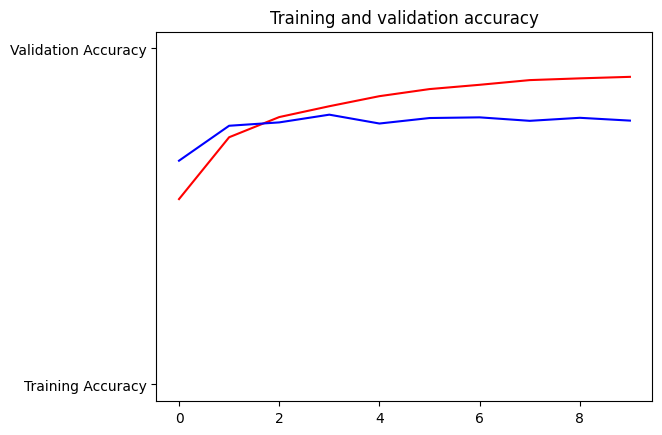

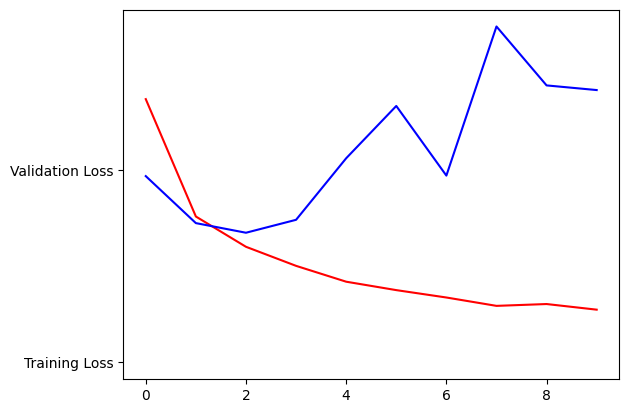

In [59]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 10, 10, 256)     

 #Load the xception model with pre-trained weights(transfer learning)

In [24]:

base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


83683744/83683744 [==============================] - 5s 0us/step


In [25]:
data_augmntaion_2=tf.keras.Sequential([
    tf.keras.layers.RandomZoom(.3,input_shape=(100,100,3)),
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation(.4)

])

In [26]:
rescaling=tf.keras.layers.Rescaling(1/255)

In [27]:
global_average_booling=tf.keras.layers.GlobalAveragePooling2D()

In [28]:
preduction=tf.keras.layers.Dense(6)

In [29]:
inputs=tf.keras.Input(shape=(100,100,3))
X=data_augmntaion_2(inputs)
X=rescaling(X)
X=base_model(X,training=False)
X=global_average_booling(X)
X=tf.keras.layers.Dropout(.25)(X)
output=preduction(X)
model_x=tf.keras.Model(inputs,output)

In [30]:
model_x.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [31]:
model_x.fit(train_generator, validation_data=validation_generator,epochs=3)

Epoch 1/3
14034/14034 [==============================] - 546s 37ms/step - loss: 0.7350 - accuracy: 0.7362 - val_loss: 0.6963 - val_accuracy: 0.7283
Epoch 2/3
14034/14034 [==============================] - 513s 37ms/step - loss: 0.5226 - accuracy: 0.8158 - val_loss: 0.8381 - val_accuracy: 0.7130
Epoch 3/3
14034/14034 [==============================] - 513s 37ms/step - loss: 0.4691 - accuracy: 0.8368 - val_loss: 0.4975 - val_accuracy: 0.8210


In [15]:
pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

94765736/94765736 [==============================] - 5s 0us/step


In [16]:
data_augmntaion_3=tf.keras.Sequential([
    tf.keras.layers.RandomZoom(.3,input_shape=(100,100,3)),
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation(.4)

])

In [17]:
rescaling=tf.keras.layers.Rescaling(1/255)

In [18]:
global_average_booling=tf.keras.layers.GlobalAveragePooling2D()

In [19]:
preduction=tf.keras.layers.Dense(6)

In [20]:
inputs=tf.keras.Input(shape=(100,100,3))
X=data_augmntaion_3(inputs)
X=rescaling(X)
X=pretrained_model(X,training=False)
X=global_average_booling(X)
X=tf.keras.layers.Dropout(.25)(X)
output=preduction(X)
model_r=tf.keras.Model(inputs,output)

In [21]:
model_r.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics='accuracy')

In [22]:
model_r.fit(train_generator, validation_data=validation_generator,epochs=3)

Epoch 1/3
14034/14034 [==============================] - 689s 45ms/step - loss: 1.7963 - accuracy: 0.1747 - val_loss: 1.7909 - val_accuracy: 0.1750
Epoch 2/3
14034/14034 [==============================] - 629s 45ms/step - loss: 1.7911 - accuracy: 0.1790 - val_loss: 1.7905 - val_accuracy: 0.1750
Epoch 3/3
14034/14034 [==============================] - 624s 44ms/step - loss: 1.7909 - accuracy: 0.1790 - val_loss: 1.7904 - val_accuracy: 0.1750


In [35]:
y_train_np = np.array(y_train)

# Reshape y_train
y_train_reshaped = y_train_np.reshape(40)

# Verify the new shape
print(y_train_reshaped.shape)

(40,)


In [44]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the encoder on the training labels
y_train_encoded = encoder.fit_transform(np.array(y_train).reshape(-1, 1))

# Transform the encoder on the test labels
y_test_encoded = encoder.transform(np.array(y_test).reshape(-1, 1))


In [40]:
x_test_reshaped = np.array(x_test)  # Convert to NumPy array
x_test_reshaped = x_test_reshaped.reshape((-1, 100, 100, 3))

compare between the models

In [49]:
# Train and evaluate model1 on the training and validation sets
from sklearn.metrics import accuracy_score
model_x.fit(x_train, y_train_reshaped)
predictions_model1 = model_x.predict(x_test_reshaped)
predicted_classes_model1 = np.argmax(predictions_model1, axis=1)
accuracy_model1 = accuracy_score(np.argmax(y_test_encoded, axis=1), predicted_classes_model1)

# Train and evaluate model2 on the training and validation sets
model_r.fit(x_train, y_train_reshaped)
predictions_model2 = model_r.predict(x_test_reshaped)
predicted_classes_model2 = np.argmax(predictions_model2, axis=1)
accuracy_model2 = accuracy_score(np.argmax(y_test_encoded, axis=1), predicted_classes_model2)

# Print and compare the validation accuracies
print("Model 1 Validation Accuracy:", accuracy_model1)
print("Model 2 Validation Accuracy:", accuracy_model2)

2/2 [==============================] - 0s 26ms/step
Model 1 Validation Accuracy: 0.8
Model 2 Validation Accuracy: 0.225
